 Load the Dataset

In [ ]:
import pandas as pd

# Load the dataset, providing column names since they are not in the file
file_path = '/content/twitter_training.csv'
df = pd.read_csv(file_path, names=['tweet_id', 'entity', 'sentiment', 'content'])

# Inspect the data
print(df.head())
print(df.info())
print(df['sentiment'].value_counts())

   tweet_id       entity sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   

                                             content  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   74682 non-null  int64 
 1   entity     74682 non-null  object
 2   sentiment  74682 non-null  object
 3   content    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None
sentiment
Negative      22542
Positive      

Data Cleaning

In [ ]:
 #Check for missing values
print(df.isnull().sum())

# If there are missing values in critical columns, drop or fill them
df.dropna(subset=['content', 'sentiment'], inplace=True) # Replace 'text' with 'content'

tweet_id       0
entity         0
sentiment      0
content      686
dtype: int64


Sentiment Distribution

<ipython-input-7-5dfbef6c5d62>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='viridis')


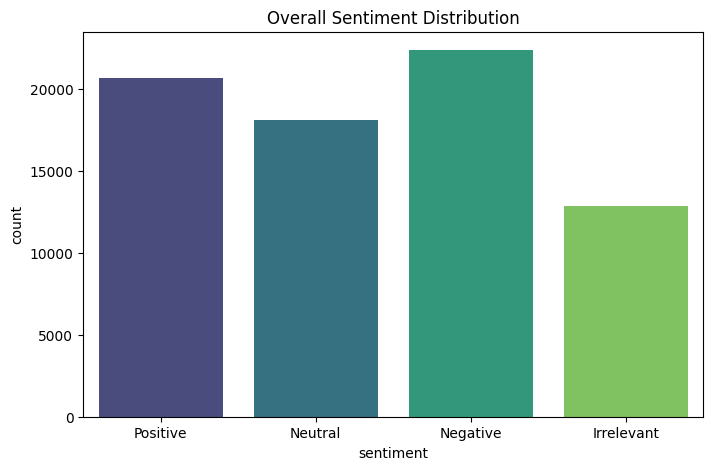

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Overall Sentiment Distribution')
plt.show()


Topic/Brand Analysis

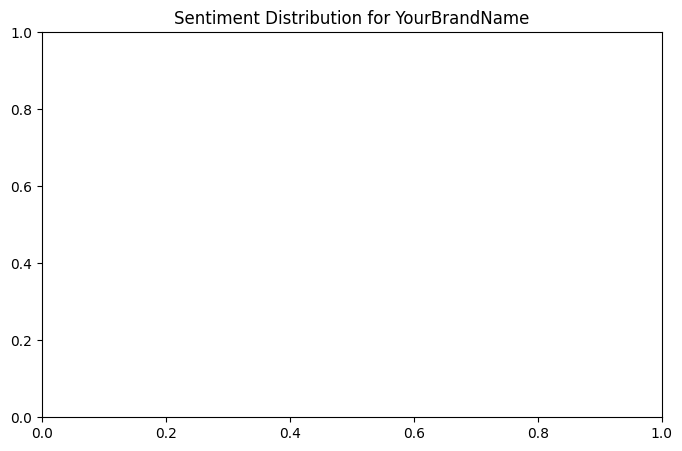

In [ ]:
# Assuming there is a column 'entity' that indicates the topic or brand
# Filter data for a specific brand or topic
brand_sentiment = df[df['entity'] == 'YourBrandName']  # Replace with actual brand name

# Visualize sentiment distribution for this brand
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=brand_sentiment, palette='coolwarm')
plt.title('Sentiment Distribution for YourBrandName')
plt.show()


Word Cloud for Sentiment Analysis

In [ ]:
from wordcloud import WordCloud

# Generate word clouds for positive and negative sentiments
positive_words = ' '.join(df[df['sentiment'] == 'positive']['content'].dropna()) # Drop any NaN values in the 'content' column
negative_words = ' '.join(df[df['sentiment'] == 'negative']['content'].dropna()) # Drop any NaN values in the 'content' column

if len(positive_words) > 0:
    # Positive sentiment word cloud
    wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_positive, interpolation='bilinear')
    plt.axis('off')
    plt.title('Positive Sentiment Word Cloud')
    plt.show()
else:
    print("No positive words found to generate word cloud.")

if len(negative_words) > 0:
    # Negative sentiment word cloud
    wordcloud_negative = WordCloud(width=800, height=400, background_color='black').generate(negative_words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_negative, interpolation='bilinear')
    plt.axis('off')
    plt.title('Negative Sentiment Word Cloud')
    plt.show()
else:
    print("No negative words found to generate word cloud.")

No positive words found to generate word cloud.
No negative words found to generate word cloud.
